In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# from skimage.measure import compare_ssim
from skimage.metrics import structural_similarity as ssim
import imutils
import skimage

In [3]:
imgA = cv2.imread("bagan1.jpg")
imgB = cv2.imread("bagan2.jpg")

In [4]:
# 转换成灰色
grayA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)

In [5]:
gray_diff = grayA - grayB
cv2.imwrite('ab.jpg',gray_diff)

True

In [6]:
(score, diff) = ssim(grayA, grayB , full=True)
# diff[diff>0.5] = 1

In [7]:
diff = (diff * 255).astype("uint8")
cv2.imwrite('diff.jpg',diff)

True

In [8]:
_,thresh = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

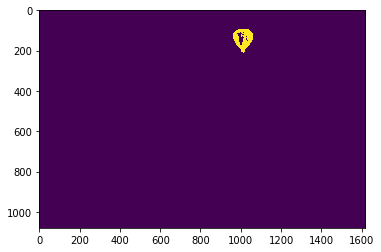

In [9]:
plt.imshow(thresh)

In [10]:
thresh

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
thresh.shape

(1080, 1620)

In [12]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [13]:
# loop over the contours
for c in cnts:
    # compute the bounding box of the contour and then draw the
    # bounding box on both input images to represent where the two
    # images differ
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(imgA, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.rectangle(imgB, (x, y), (x + w, y + h), (0, 0, 255), 2)

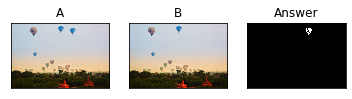

In [14]:
plt.subplot(1, 3, 1), plt.imshow(cv2.cvtColor(imgA, cv2.COLOR_BGR2RGB)), plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2), plt.imshow(cv2.cvtColor(imgB, cv2.COLOR_BGR2RGB)), plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3), plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB)), plt.title('Answer'), plt.xticks([]), plt.yticks([])
plt.show()

True

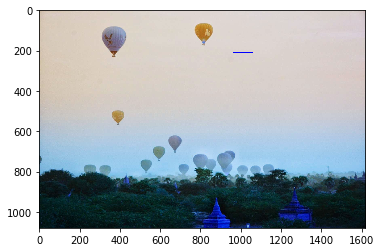

In [16]:
plt.imshow(imgB)
cv2.imwrite('resoult.jpg',imgA)